In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

act_30_path = r"D:\projects\adversarial_robustness\experiments\exp1_cmpe597_regular_mnist_robust30\activations.npy"
act_50_path = r"D:\projects\adversarial_robustness\experiments\exp1_cmpe597_regular_mnist_robust50\activations.npy"
act_70_path = r"D:\projects\adversarial_robustness\experiments\exp1_cmpe597_regular_mnist_robust70\activations.npy"

act1 = np.load(act_30_path)
act2 = np.load(act_50_path)
act3 = np.load(act_70_path)

#### Increases With Robustness

In [2]:
def mean_class_difference(act):
    return np.square((act[0].mean(axis=1) - act[1].mean(axis=1))).mean()

def class_stds(act): # Slightly dependent
    return act[0].flatten().std(), act[1].flatten().std()

def mean_class_difference_slice(act): # Smaller patches may not exhibit the same behavior
    act_slice = act[:, :, :, 4:8, 4:8].mean(axis=-1).mean(axis=-1)
    return mean_class_difference(act_slice)

#### Does Not Increase With Robustness

In [3]:
def class_sizes(act):
    return act[0].mean(), act[1].mean()

In [7]:
act1.shape

(2, 500, 5, 13, 13)

In [8]:
act1_slice = act1[:, :, :, 4:8, 4:8].mean(axis=-1).mean(axis=-1)
act2_slice = act2[:, :, :, 4:8, 4:8].mean(axis=-1).mean(axis=-1)
act3_slice = act3[:, :, :, 4:8, 4:8].mean(axis=-1).mean(axis=-1)

In [9]:
act2_slice.shape

(2, 500, 5)

In [52]:
def mean_class_examples(act):
    act_slice = act[:, :, :, 4:8, 4:8].mean(axis=-1).mean(axis=-1)
    return act_slice[0].mean(axis=0), act_slice[1].mean(axis=0)

def display_class_examples_patch(act):
    act_slice = act[:, :, :, 4:8, 4:8].mean(axis=-1).mean(axis=-1)
    
    plt.figure(figsize=(8, 8))
    dfs = []
    for class_i in [0, 1]:
        df = pd.DataFrame(act_slice[class_i])
        #df["class"] = class_i
        df.plot(kind='box')
        
    #df = pd.concat(dfs, ignore_index=True)
    plt.show()
        

<Figure size 576x576 with 0 Axes>

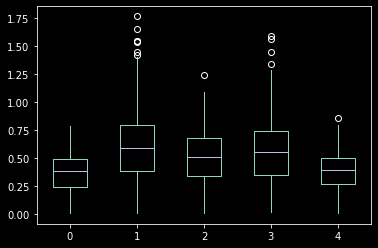

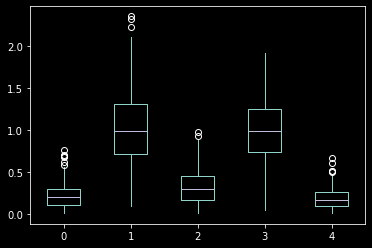

In [53]:
display_class_examples_patch(act1)

<Figure size 576x576 with 0 Axes>

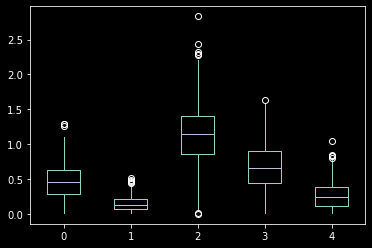

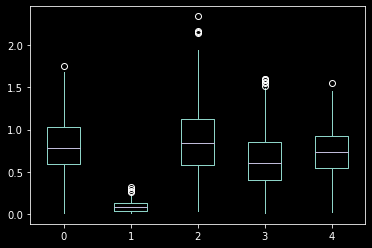

In [54]:
display_class_examples_patch(act2)

<Figure size 576x576 with 0 Axes>

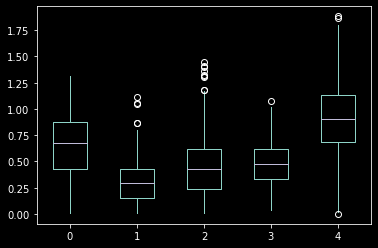

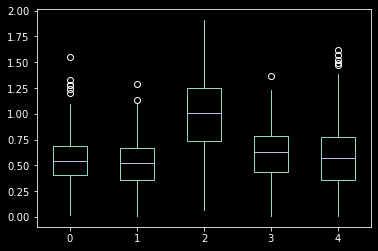

In [55]:
display_class_examples_patch(act3)

In [58]:
def get_slice(act):
    return act[:, :, :, 4:8, 4:8].mean(axis=-1).mean(axis=-1)

act1_slice = get_slice(act1)
act2_slice = get_slice(act2)
act3_slice = get_slice(act3)

In [78]:
act1_slice.shape

(2, 500, 5)

In [86]:
def get_min_dist_other_class_example(act_slice):

    min_dists0 = []
    for i_example in range(act_slice.shape[1]):
        min_dists0.append(np.min(np.square(act_slice[0, i_example].reshape(1, -1) - act_slice[1]).mean(axis=1)))
        
    min_dists1 = []
    for i_example in range(act_slice.shape[1]):
        min_dists1.append(np.min(np.square(act_slice[1, i_example].reshape(1, -1) - act_slice[0]).mean(axis=1)))
    
    return min_dists0, min_dists1

0.021320343
0.015081198


(0.0, 130.0)

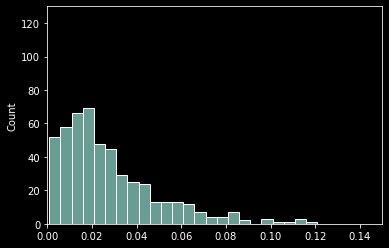

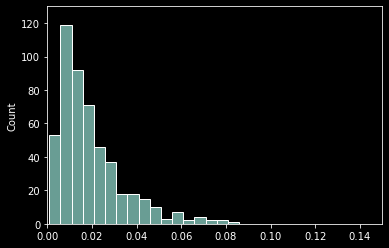

In [122]:
d0, d1 = get_min_dist_other_class_example(act1_slice)
print(np.median(d0))
print(np.median(d1))

sns.histplot(d0, binwidth=0.005)
plt.xlim([0, 0.15])
plt.ylim([0, 130])
plt.figure()
sns.histplot(d1, binwidth=0.005)
plt.xlim([0, 0.15])
plt.ylim([0, 130])

0.01180063
0.015913665


(0.0, 130.0)

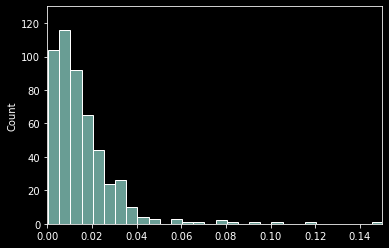

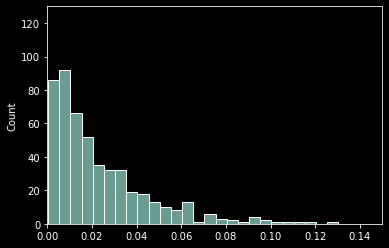

In [123]:
d0, d1 = get_min_dist_other_class_example(act2_slice)
print(np.median(d0))
print(np.median(d1))

sns.histplot(d0, binwidth=0.005)
plt.xlim([0, 0.15])
plt.ylim([0, 130])
plt.figure()
sns.histplot(d1, binwidth=0.005)
plt.xlim([0, 0.15])
plt.ylim([0, 130])

0.022810608
0.020781044


(0.0, 130.0)

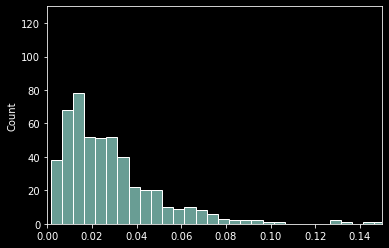

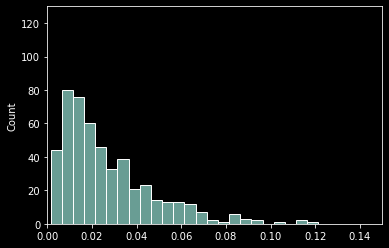

In [124]:
d0, d1 = get_min_dist_other_class_example(act3_slice)
print(np.median(d0))
print(np.median(d1))

sns.histplot(d0, binwidth=0.005)
plt.xlim([0, 0.15])
plt.ylim([0, 130])
plt.figure()
sns.histplot(d1, binwidth=0.005)
plt.xlim([0, 0.15])
plt.ylim([0, 130])